## STEP 1. Setup: Installing Required Tools

In [1]:
# Download Miniforge
system("curl -L -O https://github.com/conda-forge/miniforge/releases/latest/download/Miniforge3-$(uname)-$(uname -m).sh", ignore.stdout = TRUE, ignore.stderr = TRUE)

# Install Miniforge (you can change the path as needed)
system("bash Miniforge3-$(uname)-$(uname -m).sh -b -u -p $HOME/miniforge", ignore.stdout = TRUE, ignore.stderr = TRUE)

# Update PATH to point to the Miniforge bin files
Sys.setenv(PATH = paste0(Sys.getenv("HOME"), "/miniforge/bin:", Sys.getenv("PATH")))

In [2]:
# Use mamba to install the required bioinformatics packages
system("mamba install -y -c conda-forge -c bioconda fastqc multiqc entrez-direct parallel-fastq-dump sra-tools samtools subread")

In [3]:
# Enter commands in R (or R studio, if installed)
install.packages('Seurat')
library(Seurat)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




In [4]:
# Remove and reinstall corrupted packages
install.packages("fastmap")
install.packages("shiny")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
install.packages("Seurat")

# Install packages if not already installed
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install(c("patchwork", "ggplot2", "cowplot", "dplyr", "fastmap", "BPCells", "presto", "glmGamPoi"), force = TRUE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.3 (2024-02-29)

Installing package(s) 'BiocVersion', 'patchwork', 'ggplot2', 'cowplot',
  'dplyr', 'fastmap', 'BPCells', 'presto', 'glmGamPoi'

Warning message:
“packages ‘BPCells’, ‘presto’ are not available for Bioconductor version '3.18'

Versions of these packages for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
also installing the dependencies ‘zlibbioc’, ‘XVector’, ‘RCurl’, ‘GenomeInfoDbData’, ‘sparseMatrixStats’, ‘S4Vectors’, ‘IRanges’, ‘S4Arrays’, ‘SparseArray’, ‘rhdf5’, ‘

In [6]:
# Install the remotes package
if (!requireNamespace("remotes", quietly = TRUE)) {
  install.packages("remotes")
}
install.packages('Signac')
remotes::install_github("satijalab/seurat-data", quiet = TRUE)
remotes::install_github("satijalab/azimuth", quiet = TRUE)
remotes::install_github("satijalab/seurat-wrappers", quiet = TRUE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message:
“dependency ‘Rsamtools’ is not available”
also installing the dependencies ‘fastmatch’, ‘RcppRoll’


Warning message in install.packages("Signac"):
“installation of package ‘Signac’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Running `R CMD build`...

Installing 1 packages: data.table

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Running `R CMD build`...

Installing 2 packages: curl, hdf5r

Warning message in i.p(...):
“installation of package ‘hdf5r’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Running `R CMD build`...

Warning message in i.p(...):
“installation of package ‘/tmp/RtmpOQ11iD/file7b84282d57fe/SeuratDisk_0.0.0.9021.tar.gz’ had non-zero exit status”
Installing 49 packages: curl, futile.options, lambda.r, snow, futile.l

In [7]:
# Load Seurat library for scRNA-seq analysis
library(dplyr)
library(Seurat)
library(patchwork)
library(ggplot2)
library(cowplot)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [8]:
# Create necessary directories on your host machine (outside Docker)
dir.create("data", recursive = TRUE)
dir.create("data/raw_data")
dir.create("data/seurat_output")

Warning message in dir.create("data", recursive = TRUE):
“'data' already exists”
Warning message in dir.create("data/raw_data"):
“'data/raw_data' already exists”
Warning message in dir.create("data/seurat_output"):
“'data/seurat_output' already exists”


In [9]:
# Detect number of cores
num_cores <- parallel::detectCores(logical = TRUE)
THREADS <- max(1, num_cores - 1)
print(paste("Number of threads:", THREADS))

[1] "Number of threads: 7"


## STEP 2. Experimental Design / Dataset¶

In [10]:
# Download the supplementary data (TAR file) from GEO
system("wget -O data/raw_data/GSE167013_RAW.tar 'https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167013/suppl/GSE167013_RAW.tar'")


In [11]:
# Download the supplementary data (TAR file) from GEO
system("curl -o data/raw_data/GSE167013_RAW.tar 'https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167013/suppl/GSE167013_RAW.tar'")


In [31]:
# Extract the TAR file
system("tar -xvf data/raw_data/GSE167013_RAW.tar -C data/raw_data")

# Create the GSM5090775 directory if it doesn't exist
dir.create("data/raw_data/GSM5090775", recursive = TRUE)

# Rename the extracted files to match Seurat's expected names
system("mv data/raw_data/GSM5090775_MGE_barcodes.tsv.gz data/raw_data/GSM5090775/barcodes.tsv.gz")
system("mv data/raw_data/GSM5090775_MGE_features.tsv.gz data/raw_data/GSM5090775/features.tsv.gz")
system("mv data/raw_data/GSM5090775_MGE_matrix.mtx.gz data/raw_data/GSM5090775/matrix.mtx.gz")



Warning message in dir.create("data/raw_data/GSM5090775", recursive = TRUE):
“'data/raw_data/GSM5090775' already exists”


In [83]:
# Load data
data_dir <- "data/raw_data/GSM5090775"
pbmc.data  <- Read10X(data.dir = data_dir)

# Create a Seurat object
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "Mouse_SC", min.cells = 3, min.features = 200)
pbmc

An object of class Seurat 
18520 features across 6230 samples within 1 assay 
Active assay: RNA (18520 features, 0 variable features)
 1 layer present: counts

## STEP 3. Quality Control, Filtering, and Normalization

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


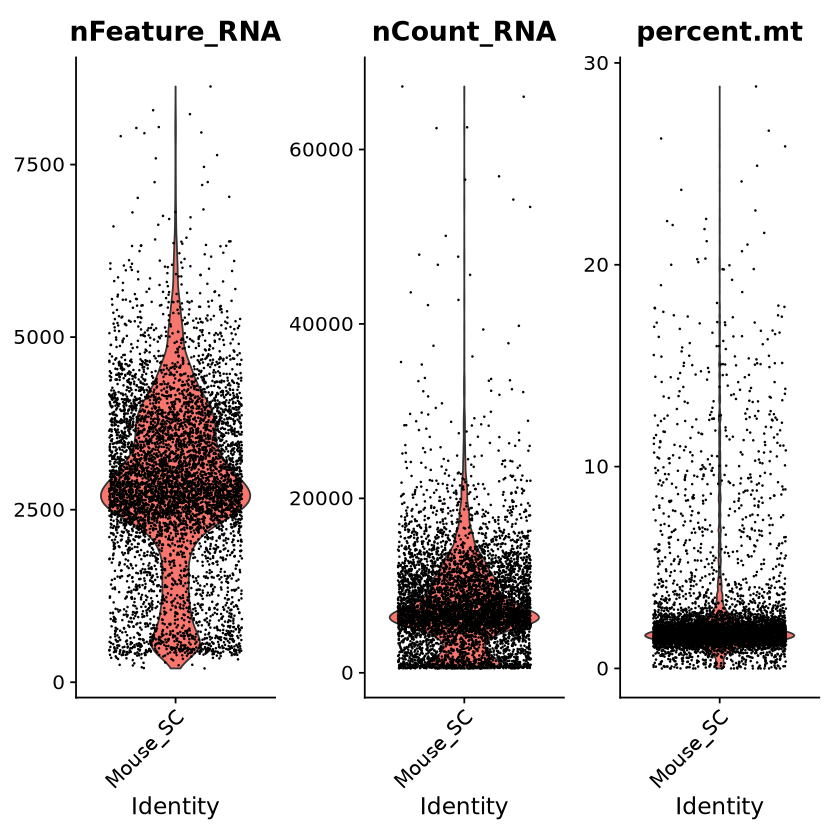

Normalizing layer: counts



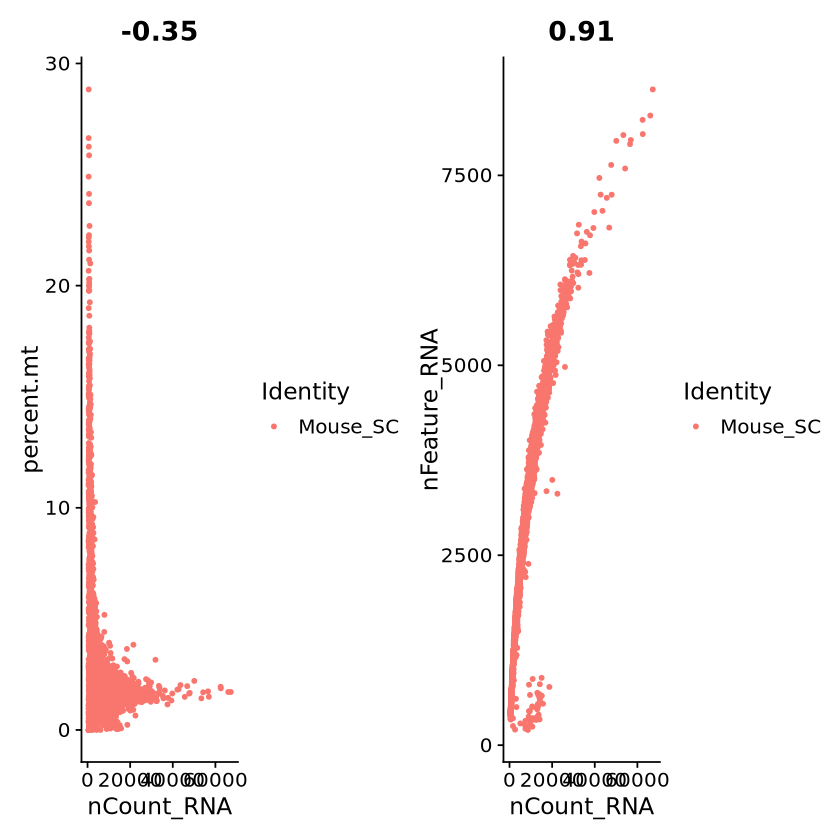

In [84]:
# Quality control
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^mt-")

# Plot QC metrics
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

# Filter cells based on QC metrics
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

# Normalize the data
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)


## STEP 4. Identifying Highly Variable Genes

Finding variable features for layer counts

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


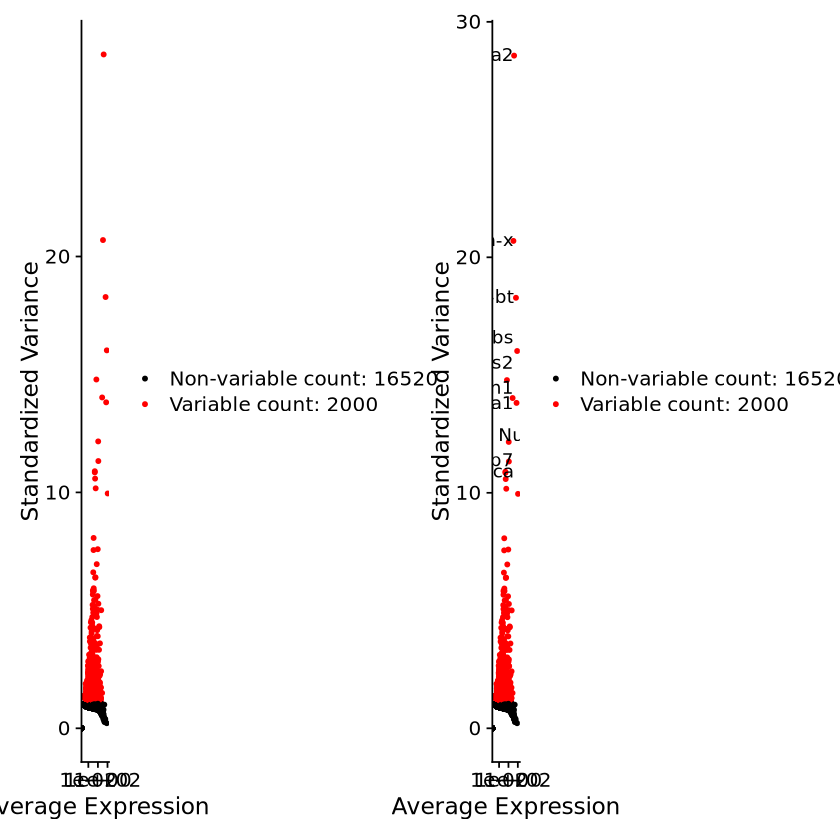

In [85]:
# Identify highly variable genes
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

## STEP 5. Labeling Cell Types

Centering and scaling data matrix

PC_ 1 
Positive:  2810417H13Rik, Dbi, Top2a, Fabp7, Birc5, Cdca8, Anp32b, Phgdh, Hes5, Vim 
	   H2afz, Cks2, Prdx1, Cdk1, Prc1, Dut, Cenpf, Ccna2, Gng5, Tuba1b 
	   Pbk, Spc24, Ldha, Ran, Olig2, Ube2c, Cks1b, Nusap1, Rgcc, Tpx2 
Negative:  Dcx, Ncam1, Auts2, Arx, Runx1t1, Igfbpl1, Aplp1, Celf4, Dpysl3, Gad2 
	   Chd3, Bcl11a, Hist3h2ba, RP23-145L9.6, Epha5, Dclk2, Dlx5, Tagln3, Thra, Mapt 
	   Gpc2, A930011O12Rik, Syt1, Elavl2, Tmem108, Ina, Celf5, Myt1l, Akap9, Ankrd12 
PC_ 2 
Positive:  H2afv, Ckb, Abracl, Sox2, H2afz, Pantr1, Dlx1, Ube2c, Nkx2-1, Ccnd2 
	   Dlx2, Cenpf, Ascl1, Anp32e, Insm1, 2700094K13Rik, Cdca7, Birc5, H1fx, Sp9 
	   Top2a, Ezr, Nasp, Tpx2, Ube2s, Pbk, Ccna2, Cdca8, Ckap2l, Prc1 
Negative:  Igfbp7, Bgn, Sparcl1, Rgs5, Ndufa4l2, Col4a2, Gng11, Eva1b, Itm2a, Vtn 
	   Nid1, Rcsd1, Atp1a2, Kcnj8, Epas1, Foxq1, Lamb1, Esam, Cd248, Ppic 
	   Foxd1, Pdzd2, Cox4i2, Heyl, Ramp2, Pdgfrb, Emcn, Sept4, Tbx2, Pltp 
PC_ 3 
Positive:  H2afv, H2a

ERROR: Error in RenameIdents.Seurat(pbmc, `0` = "CellTypeA", `1` = "CellTypeB"): Cannot find any of the provided identities


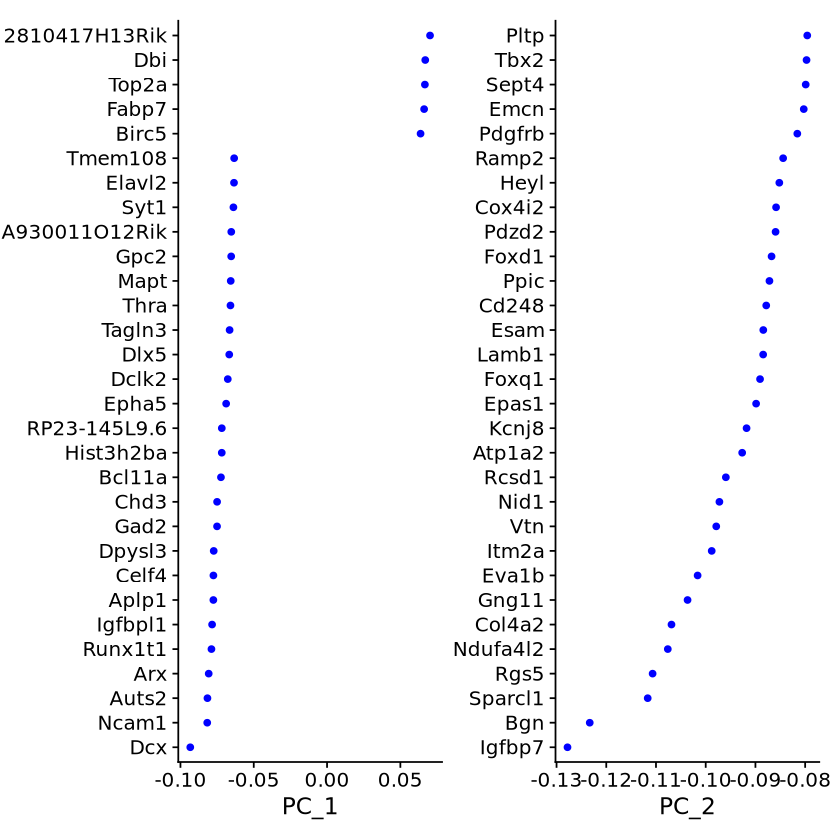

In [86]:
# Run PCA
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")


# Label cells
pbmc <- RenameIdents(pbmc, "0" = "CellTypeA", "1" = "CellTypeB")

## STEP 6. Plots and Analyzing Results

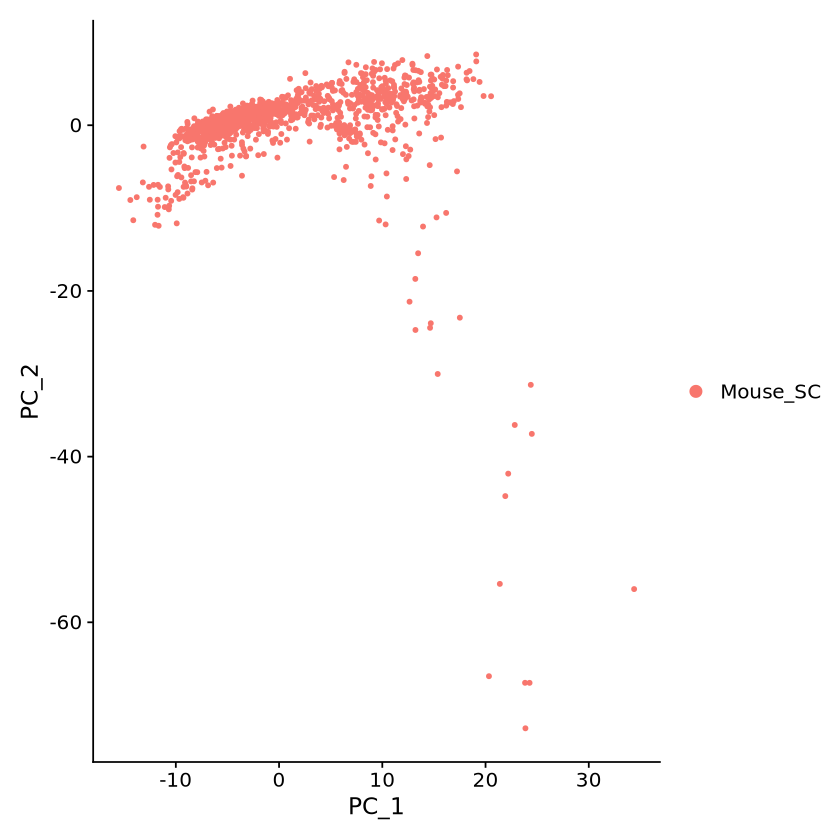

In [87]:
# PCA plot
DimPlot(pbmc, reduction = "pca")

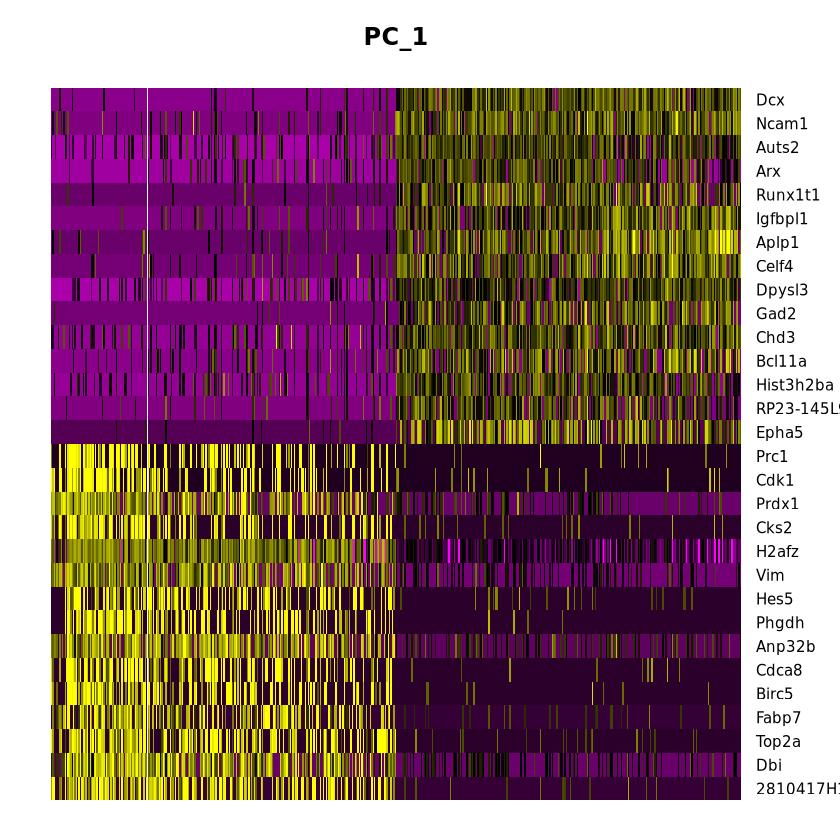

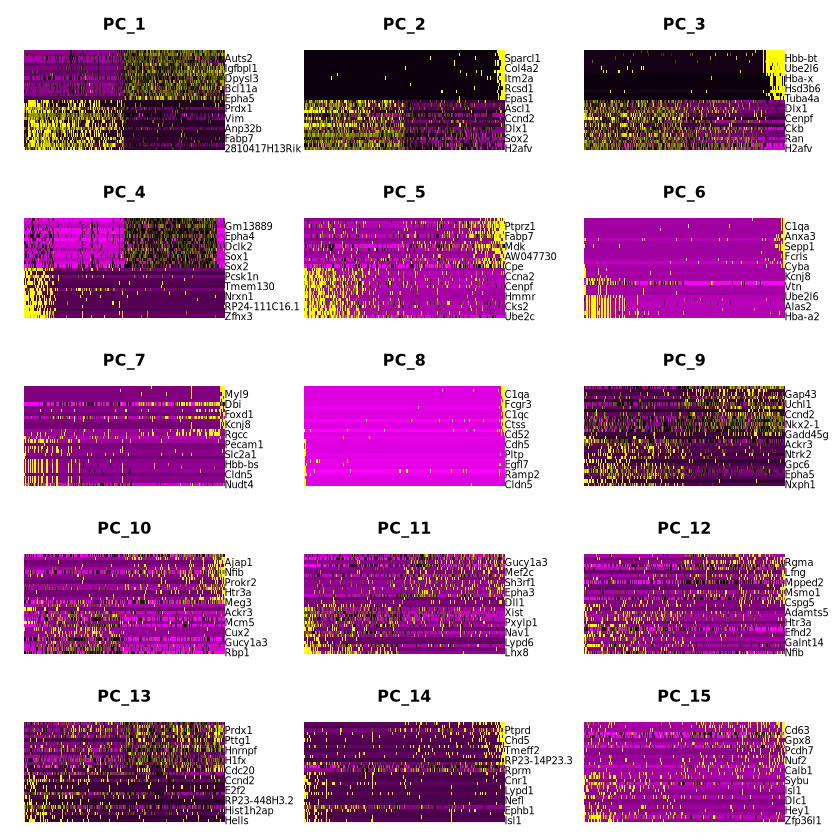

In [88]:
# Heatmap of top variable genes
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)
DimHeatmap(pbmc, dims = 1:15, cells = 500, balanced = TRUE)
#DoHeatmap(pbmc, features = top10)

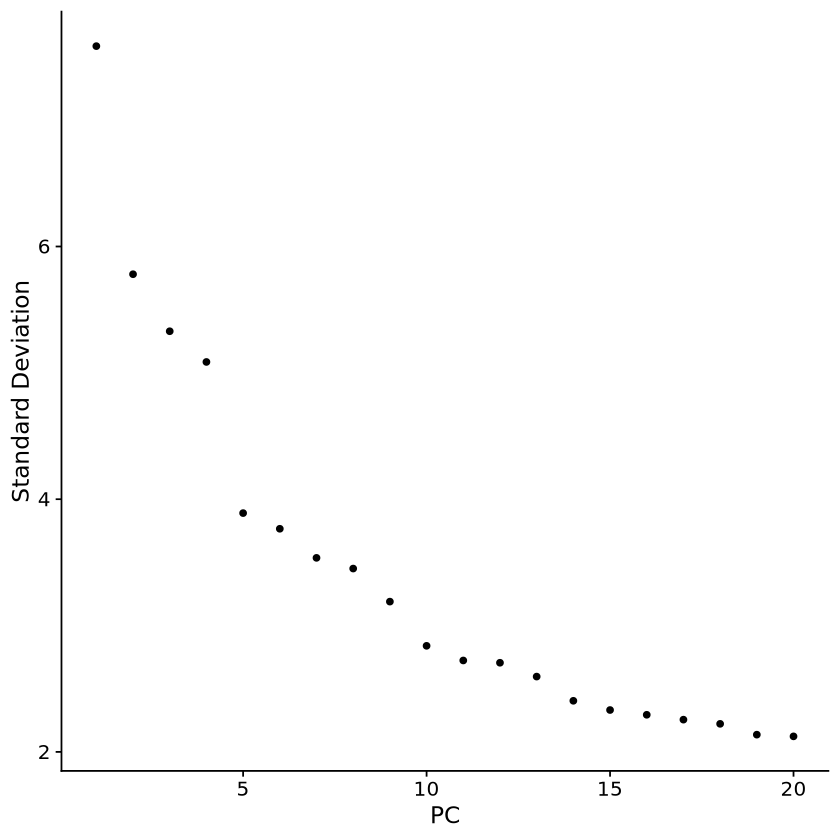

In [89]:
# Elbow plot to determine optimal number of PCs
ElbowPlot(pbmc)

In [90]:
# Identify clusters
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)
# Look at cluster IDs of the first 5 cells
head(Idents(pbmc), 5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1480
Number of edges: 45096

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8310
Number of communities: 8
Elapsed time: 0 seconds


AAACGCTGTCGAGATG-1 AAACGCTTCTCATTAC-1 AAAGAACTCAGCTAGT-1 AAAGGGCCACTCTCGT-1 
                 2                  7                  1                  2 
AAAGGGCCAGTTAGAA-1 
                 1 
Levels: 0 1 2 3 4 5 6 7

02:03:47 UMAP embedding parameters a = 0.9922 b = 1.112

02:03:47 Read 1480 rows and found 10 numeric columns

02:03:47 Using Annoy for neighbor search, n_neighbors = 30

02:03:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

02:03:48 Writing NN index file to temp file /tmp/RtmpOQ11iD/file7b84327a3f3b

02:03:48 Searching Annoy index using 1 thread, search_k = 3000

02:03:48 Annoy recall = 100%

02:03:49 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

02:03:50 Initializing from normalized Laplacian + noise (using RSpectra)

02:03:50 Commencing optimization for 500 epochs, with 55826 positive edges

02:03:54 Optimization finished



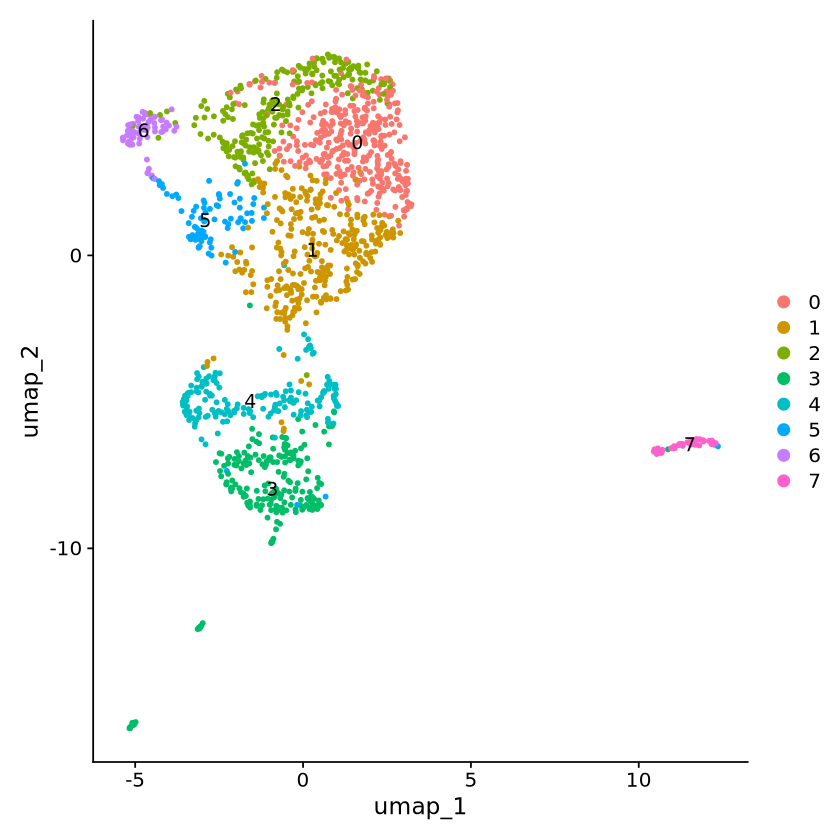

In [91]:
# Run UMAP
pbmc <- RunUMAP(pbmc, dims = 1:10)
DimPlot(pbmc, reduction = "umap", label = TRUE)
saveRDS(pbmc, file = "data/seurat_output/pbmc_tutorial.rds")

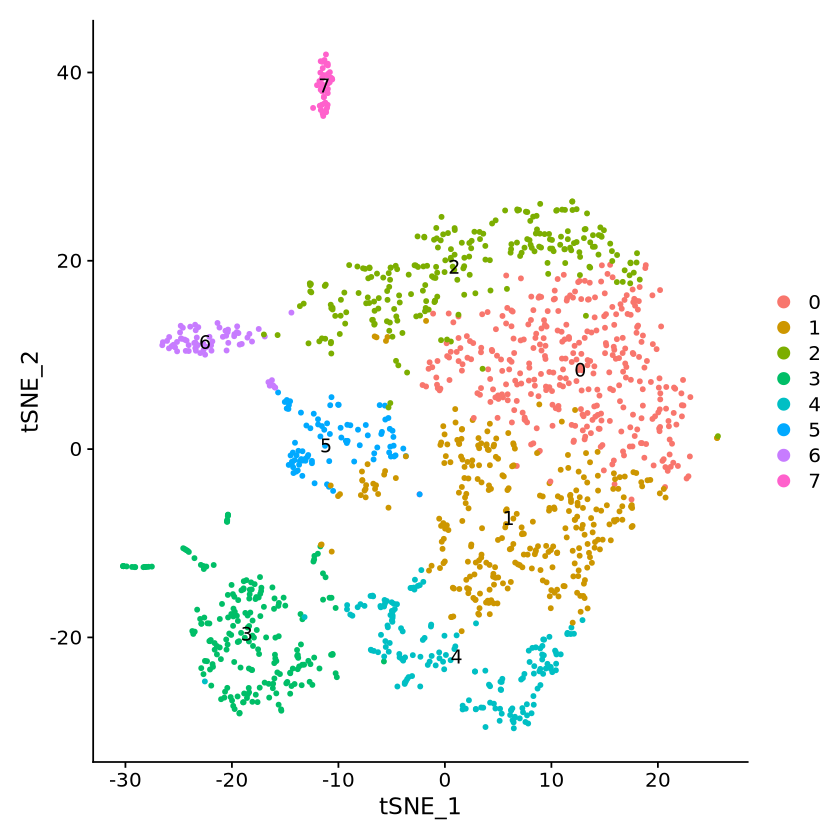

In [92]:
# Run t-SNE
pbmc <- RunTSNE(pbmc, dims = 1:10)
DimPlot(pbmc, reduction = "tsne", label = TRUE)

## STEP 7. Differentially expressed features

In [93]:
# find all markers of cluster 2
cluster2.markers <- FindMarkers(pbmc, ident.1 = 2)
head(cluster2.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nxph1,1.098304e-80,2.778368,0.715,0.163,2.034060e-76
Malat1,1.263764e-71,1.217628,1.000,0.906,2.340491e-67
Erbb4,8.381934e-48,2.263513,0.565,0.162,1.552334e-43
A330076H08Rik,2.763096e-45,2.147693,0.644,0.230,5.117253e-41
Nrxn3,4.637876e-45,1.079256,0.996,0.673,8.589346e-41


In [94]:
# find markers for every cluster compared to all remaining cells, report only the positive ones
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE)
pbmc.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.560858e-50,1.214858,0.861,0.398,6.594710e-46,0,Slain1
9.035070e-41,1.272190,0.647,0.241,1.673295e-36,0,Maf
2.217404e-38,1.010844,0.746,0.347,4.106633e-34,0,Epha5
1.731764e-33,1.691462,0.454,0.151,3.207226e-29,0,Plxna4
3.072980e-32,1.109857,0.659,0.303,5.691160e-28,0,Ackr3
5.941302e-31,1.158415,0.636,0.276,1.100329e-26,0,Csrnp3
7.217303e-30,1.037351,0.682,0.325,1.336644e-25,0,Cdk14
1.375861e-26,1.555522,0.361,0.109,2.548094e-22,0,RP24-393F8.2
5.457869e-22,1.047334,0.581,0.303,1.010797e-17,0,Rprm


In [95]:
cluster0.markers <- FindMarkers(pbmc, ident.1 = 7, logfc.threshold = 0.25, test.use = "roc", only.pos = TRUE)
head(cluster0.markers, 10)

,myAUC,avg_diff,power,avg_log2FC,pct.1,pct.2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hba-a2,1.000,5.858381,1.000,10.690149,1.000,0.017
Hba-a1,1.000,6.602285,1.000,10.561884,1.000,0.059
Hbb-bs,1.000,7.040108,1.000,11.304507,1.000,0.045
Hbb-bt,0.989,6.648951,0.978,11.245023,0.979,0.026
Fth1,0.974,2.305337,0.948,3.445907,1.000,0.897
Blvrb,0.973,2.155888,0.946,6.239196,0.958,0.027
Alas2,0.968,2.592586,0.936,9.692653,0.938,0.001
Ube2l6,0.934,1.632634,0.868,6.967192,0.875,0.013
Bpgm,0.929,1.697677,0.858,3.188471,0.958,0.349


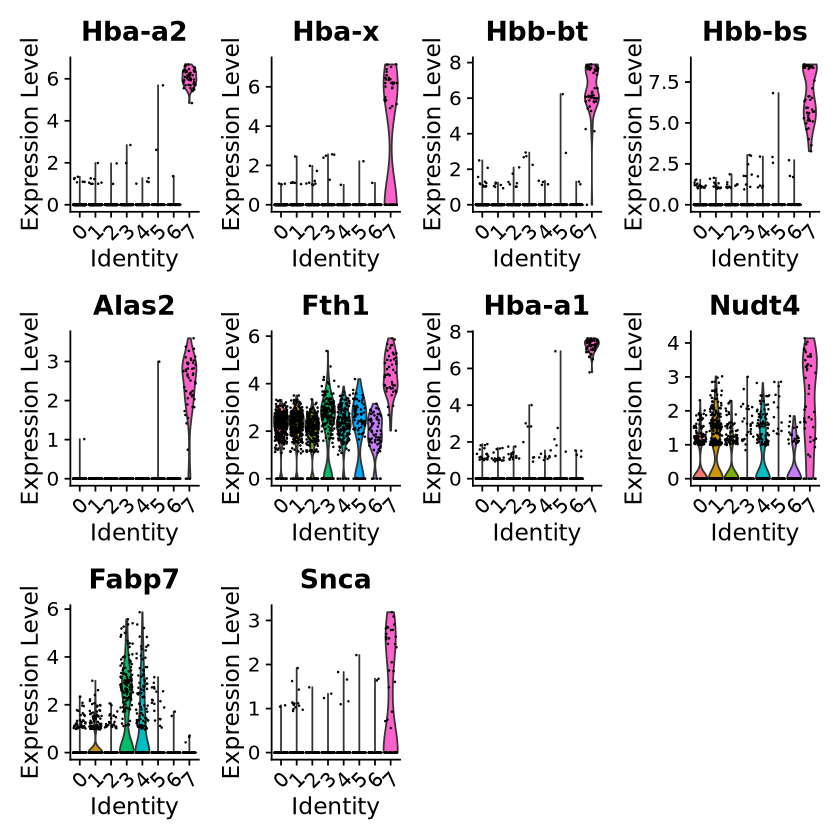

In [96]:
# Assuming you have identified highly variable genes using FindVariableFeatures
top_genes <- head(VariableFeatures(pbmc), 10)  # Get top 10 highly variable genes
VlnPlot(pbmc, features = top_genes)

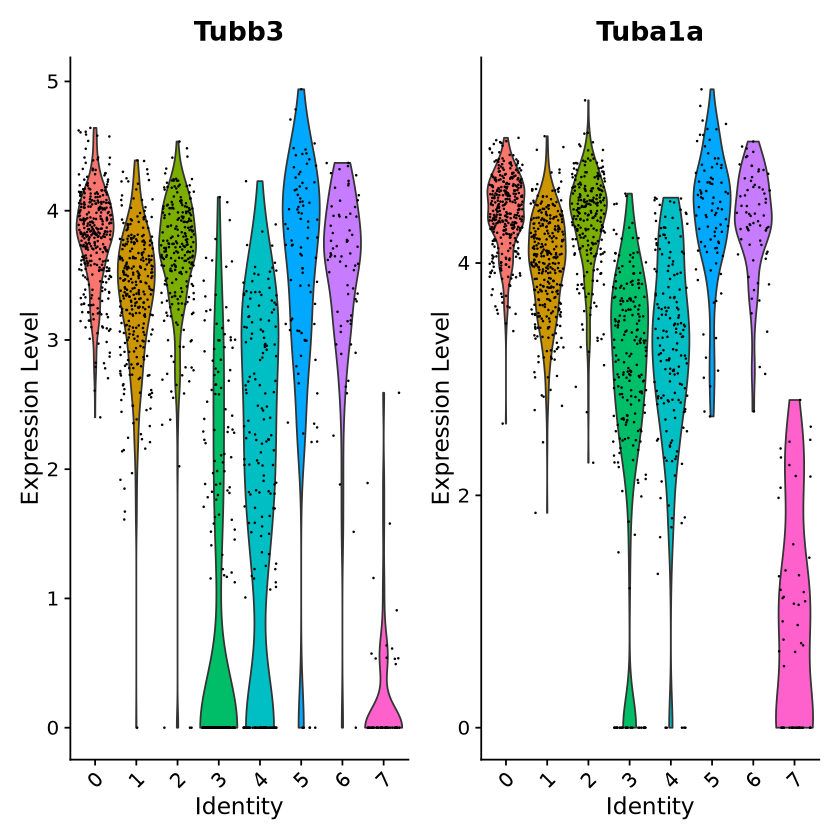

In [97]:
# Violin Plot
VlnPlot(pbmc, features = c("Tubb3", "Tuba1a"))

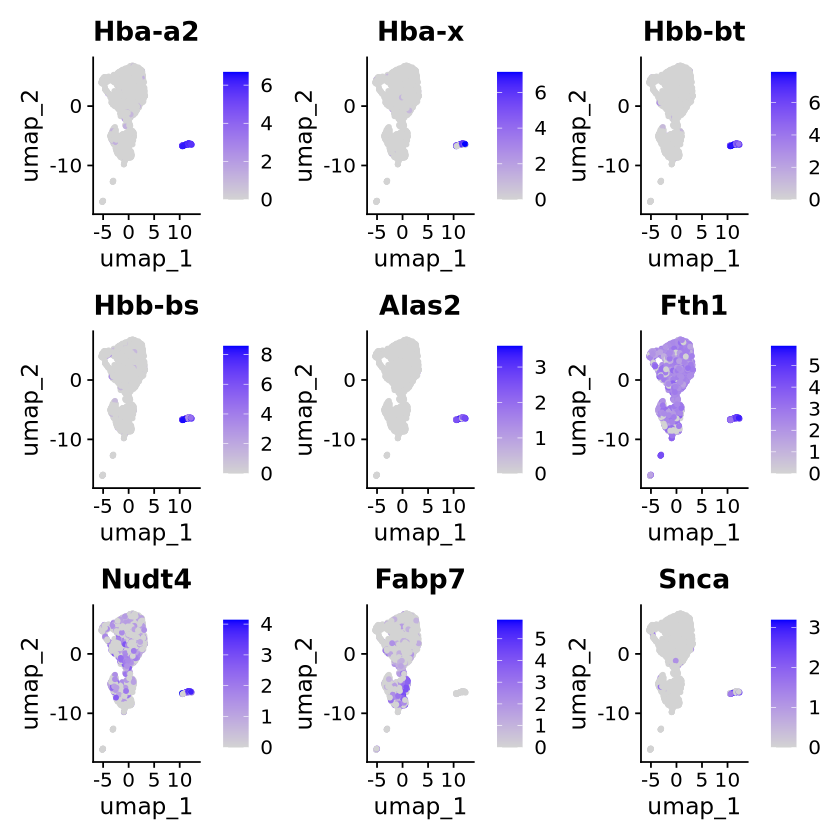

In [98]:
FeaturePlot(pbmc, features = c("Hba-a2", "Hba-x", "Hbb-bt", "Hbb-bs", "Alas2", "Fth1", "Nudt4", "Fabp7",
    "Snca"))

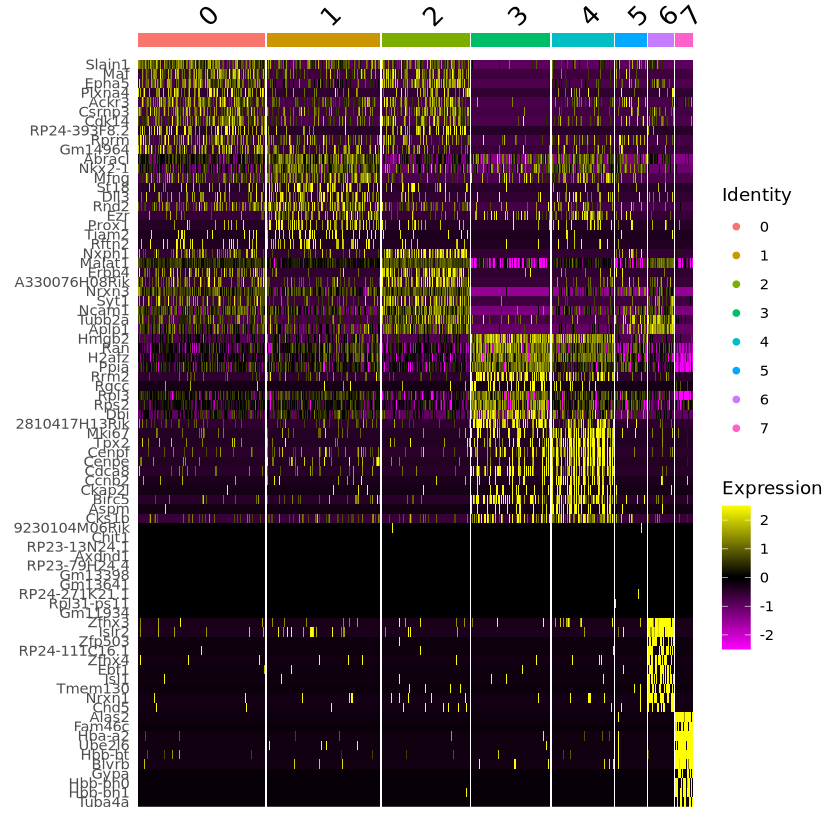

In [62]:
pbmc.markers %>%
    group_by(cluster) %>%
    dplyr::filter(avg_log2FC > 1) %>%
    slice_head(n = 10) %>%
    ungroup() -> top10
DoHeatmap(pbmc, features = top10$gene)

## Assigning cell type identity to clusters

Warning message:
“Cannot find identity NA”


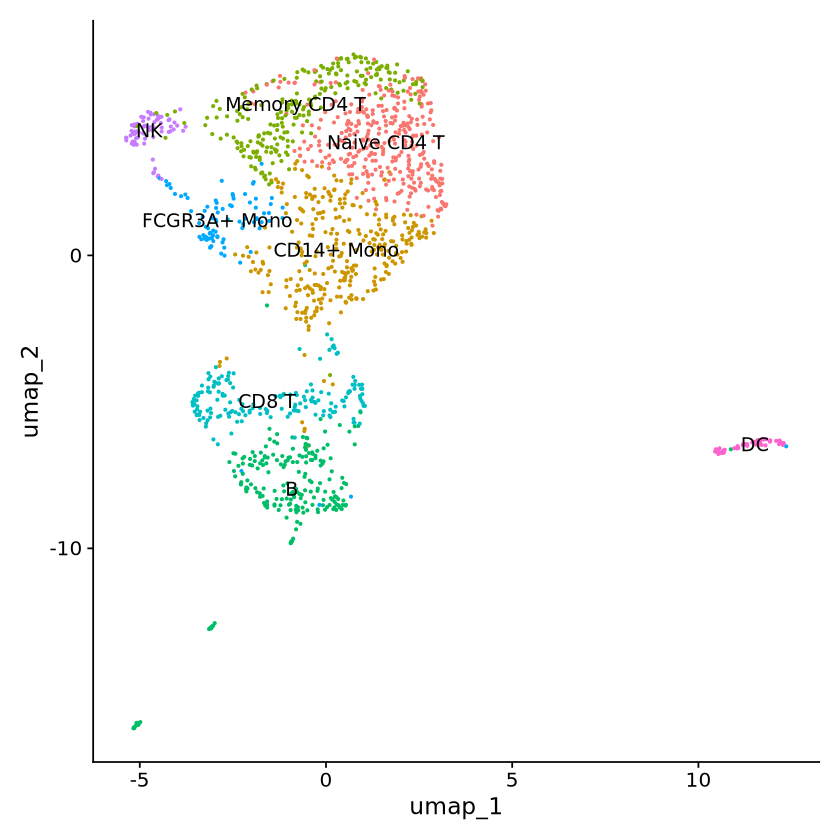

In [63]:
## RENAME THE CLUSTERS AS NEEDED
new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono",
    "NK", "DC", "Platelet")
names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

In [100]:
library(ggplot2)
plot <- DimPlot(pbmc, reduction = "umap", label = TRUE, label.size = 4.5) + xlab("UMAP 1") + ylab("UMAP 2") +
    theme(axis.title = element_text(size = 18), legend.text = element_text(size = 18)) + guides(colour = guide_legend(override.aes = list(size = 10)))
ggsave(filename = "data/seurat_output/pbmc3k_umap.jpg", height = 7, width = 12, plot = plot, quality = 50)

In [101]:
saveRDS(pbmc, file = "data/seurat_output/pbmc3k_final.rds")
